In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat

In [3]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Display the first few rows of the DataFrame to get an overview of the data
df.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Missing Values:
 uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64
Duplicate Rows: 0


In [6]:
# Delete rows with missing values in the 'condition' column
df_cleaned = df.dropna(subset=['condition'])

# Check the shape of the DataFrame after removing missing values
print("Shape of DataFrame after removing missing values in the 'condition' column:", df_cleaned.shape)


Shape of DataFrame after removing missing values in the 'condition' column: (160398, 7)


In [7]:
# Check for data types and summary statistics
data_info = df.info()
print("\nData Information:\n", data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB

Data Information:
 None


In [8]:
# Check for descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
             uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


# Check for Data Integrity:

    Look for any inconsistencies or anomalies in the data.
    Verify if the data types of each column are appropriate.
    Ensure that all data entries are valid and make sense in the context of the dataset.

In [9]:
print("Data Types:")
print(df_cleaned.dtypes)

Data Types:
uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object


# Identify Gaps in Data Analytics:

    Review the data distribution and identify any unusual patterns.
    Evaluate the usefulness of the available features for analysis and decision-making.
    Consider whether additional data or features could enhance the analysis.

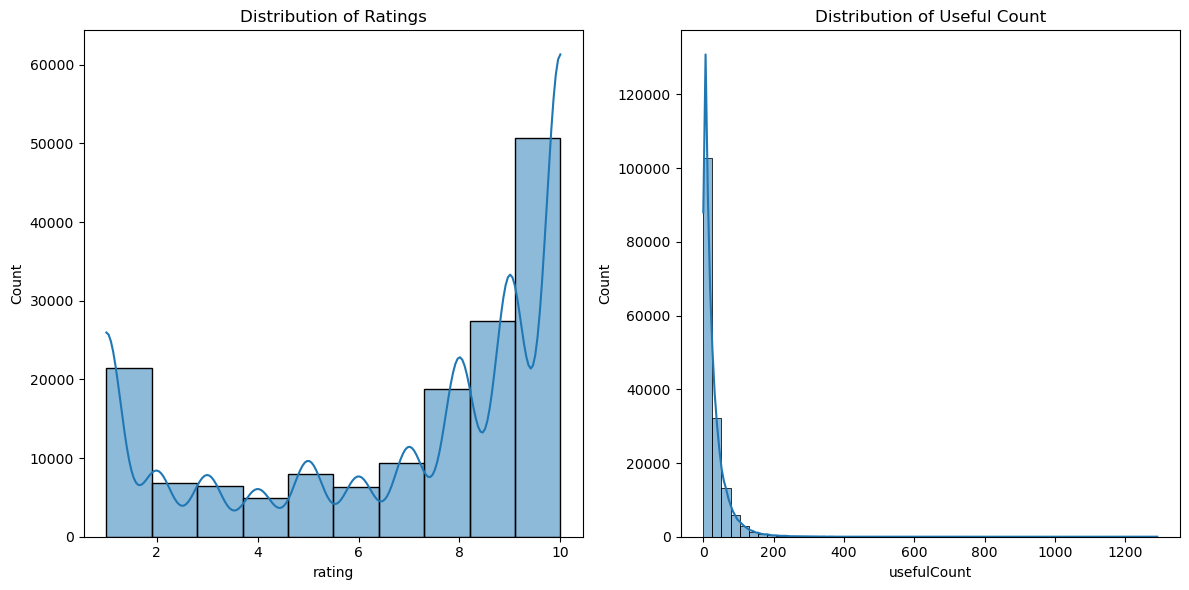

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['usefulCount'], bins=50, kde=True)
plt.title('Distribution of Useful Count')

plt.tight_layout()
plt.show()

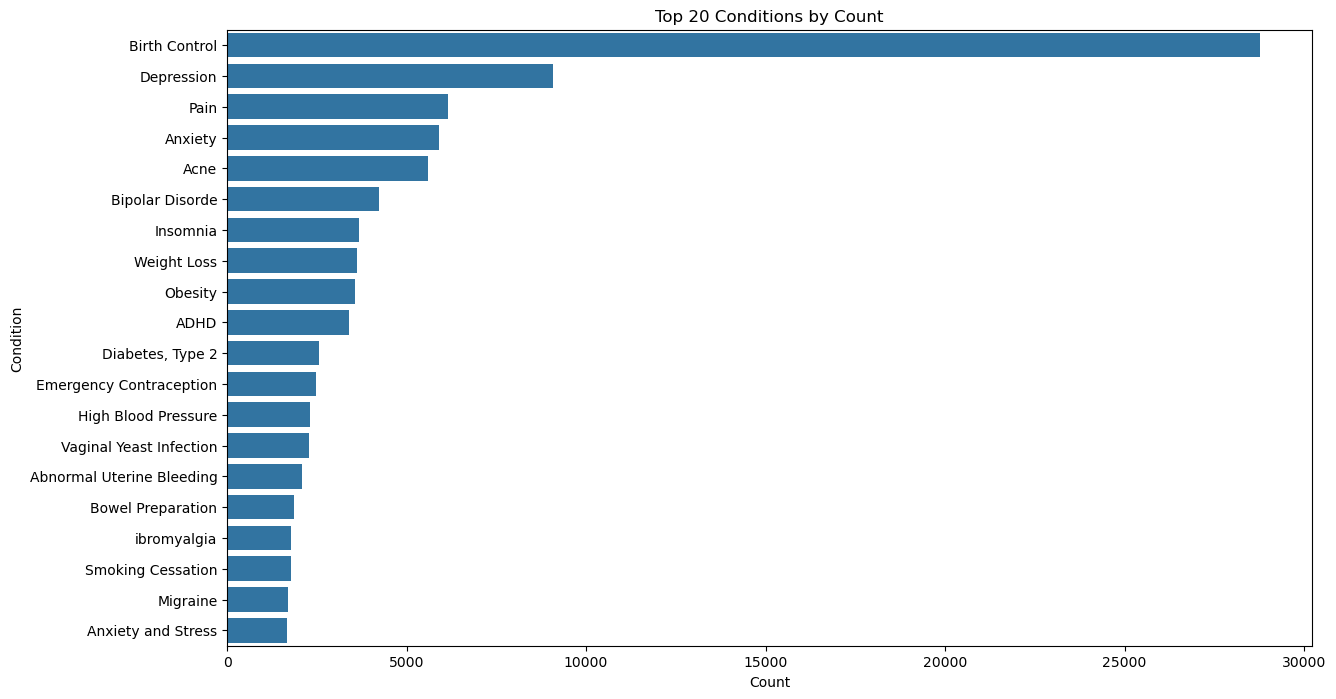

In [11]:
# Task 1: Plot showing the Top 20 Conditions by Count

plt.figure(figsize=(14, 8))
plt.title('Top 20 Conditions by Count')
sns.countplot(data=df, y='condition', order=df['condition'].value_counts().index[:20])
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [13]:

# Check for data types and summary statistics
data_info = df_cleaned.info()
print("\nData Information:\n", data_info)


<class 'pandas.core.frame.DataFrame'>
Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ MB

Data Information:
 None


In [14]:

# Check for descriptive statistics
descriptive_stats = df_cleaned.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)



Descriptive Statistics:
             uniqueID         rating    usefulCount
count  160398.000000  160398.000000  160398.000000
mean   115957.147309       6.995923      28.097613
std     67015.899492       3.272303      36.457876
min         2.000000       1.000000       0.000000
25%     58065.250000       5.000000       6.000000
50%    115845.500000       8.000000      16.000000
75%    173826.750000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


In [15]:

# Hypothesis testing: Compare ratings of different drugs
# Example: Compare ratings of Levonorgestrel and Etonogestrel
levonorgestrel_ratings = df_cleaned[df_cleaned['drugName'] == 'Levonorgestrel']['rating']
etonogestrel_ratings = df_cleaned[df_cleaned['drugName'] == 'Etonogestrel']['rating']


In [16]:

# Perform t-test
t_stat, p_value = ttest_ind(levonorgestrel_ratings, etonogestrel_ratings)
print("\nHypothesis Testing Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The difference in ratings between Levonorgestrel and Etonogestrel is statistically significant.")
else:
    print("There is no statistically significant difference in ratings between Levonorgestrel and Etonogestrel.")




Hypothesis Testing Results:
T-Statistic: 20.689647449791543
P-Value: 2.4885341119723292e-92
The difference in ratings between Levonorgestrel and Etonogestrel is statistically significant.


In [17]:
# Correlation Analysis: Correlation between drug ratings and conditions
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Delete rows with missing values in the 'condition' column
df_cleaned = df.dropna(subset=['condition'])

# Convert condition labels to numeric values for correlation analysis
df_cleaned['condition_code'] = df_cleaned['condition'].astype('category').cat.codes

# Calculate the correlation between drug ratings and condition codes
rating_condition_corr = df_cleaned['rating'].corr(df_cleaned['condition_code'])

print("\nCorrelation between Drug Ratings and Condition Codes:", rating_condition_corr)



Correlation between Drug Ratings and Condition Codes: 0.05103031419545069


C:\Users\Pc\AppData\Local\Temp\ipykernel_18260\2155851637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['condition_code'] = df_cleaned['condition'].astype('category').cat.codes


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [27]:
import nbformat

# Load your notebook
with open(r'C:\Users\Pc\Desktop\Arden\6-Data Handling and Decision Making\Data Handling and Decision Making.ipynb', 'r', encoding='utf-8') as notebook_file:
    notebook_content = notebook_file.read()

# Parse the notebook content
notebook = nbformat.reads(notebook_content, as_version=4)

# Apply any normalization or cleanup steps here

# Save the normalized notebook
with open('normalized_notebook.ipynb', 'w', encoding='utf-8') as output_file:
    nbformat.write(notebook, output_file)


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['review'], df_cleaned['rating'], test_size=0.2, random_state=42)


In [1]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


NameError: name 'TfidfVectorizer' is not defined